# Introduction

Relevant Information: Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years. These systems help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead. This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age. It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes together with the ground truth (the severity field) for 516 benign and 445 malignant masses that have been identified on full field digital mammograms collected at the Institute of Radiology of the University Erlangen-Nuremberg between 2003 and 2006. Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal a given value (varying from 0 to 6), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists.

# Goals and Objectives:
    
    Finding the best Models to predict the severity (benign or malignant) of a mammographic mass lesion.
    make a prediction based on different machine learning models ranging from:
        - KNN (K Nearest Neighbors)
        - SVM
        - Decision Tree
    Using more sophisticated techniques to improve the result, like:
        - ensemble techniques like Random Forest
        - Bagging
        - Boosting (Adaboost)
        - Voting

        
    

# Data

1. Title: Mammographic Mass Data


2. Sources:
   Original owners of database:
        Prof. Dr. Rüdiger Schulz-Wendtland
        Institute of Radiology, Gynaecological Radiology, University Erlangen-Nuremberg
        Universitätsstraße 21-23
        91054 Erlangen, Germany
        
3. Attribute Information:

   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
   
4. Severity is our target variable.


# Improrting python libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

Loading the dataset, shown in the table below:

There are missing values shown by '?' in dataset.

In [5]:
df_first = pd.read_csv('mammographic_masses.data.txt', header=None, 
                 names=['BI-RADS','age','shape','margin','density','severity'])
df_first.head(10)

,BI-RADS,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
5,4,65,1,?,3,0
6,4,70,?,?,3,0
7,5,42,1,?,3,0
8,5,57,1,5,3,1
9,5,60,?,5,1,1


In [8]:
## our data set has 961 rows and 6 columns
df_first.shape 

(961, 6)



Data Cleaning and Description:

load data using pandas library. Dataset's missing values are represented by '?'. Using na_values = '?' to replace ? by NaN.


In [9]:
df = pd.read_csv('mammographic_masses.data.txt', header=None, 
                 names=['BI-RADS','age','shape','margin','density','severity'], na_values='?' )


df_first.head(10)

,BI-RADS,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
5,4,65,1,?,3,0
6,4,70,?,?,3,0
7,5,42,1,?,3,0
8,5,57,1,5,3,1
9,5,60,?,5,1,1


In [10]:
##  checking the frequency of every columns, for example as it can be seen, 4 is happen to be in BI-RADS for 547.
##  it shows with ?(null variables) can be replaced by mode instead of mean or median. due to the high iterarion of some numbers.

print([df[col].value_counts() for col in df.columns.drop('age')])

[4.0     547
5.0     345
3.0      36
2.0      14
6.0      11
0.0       5
55.0      1
Name: BI-RADS, dtype: int64, 4.0    400
1.0    224
2.0    211
3.0     95
Name: shape, dtype: int64, 1.0    357
4.0    280
5.0    136
3.0    116
2.0     24
Name: margin, dtype: int64, 3.0    798
2.0     59
1.0     16
4.0     12
Name: density, dtype: int64, 0    516
1    445
Name: severity, dtype: int64]


checking for total number of null observation in each column.  

In [11]:
col_null = [df[col].isnull().values.sum() for col in df.columns]
for i in range(0,6):
    print(df.columns[i],':',col_null[i])

BI-RADS : 2
age : 5
shape : 31
margin : 48
density : 76
severity : 0


Using  fillna( ) function to replace mode of every column instead of corresponding null observations.

In [14]:
for col in df.columns:
    
    df[col].fillna(df[col].mode()[0], inplace=True)
df.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,3.0,1


In [17]:
## Check if there is any null observation in data set
df[col].isnull().values.sum()

0

In [21]:
# Check if there is any duplicated rows in dataset
df[df.duplicated(keep=False)]

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
12,4.0,64.0,1.0,1.0,3.0,0
15,4.0,54.0,1.0,1.0,3.0,0
17,4.0,59.0,2.0,1.0,3.0,1
19,4.0,40.0,1.0,1.0,3.0,0
22,4.0,43.0,1.0,1.0,3.0,0
23,5.0,42.0,4.0,4.0,3.0,1
25,5.0,75.0,4.0,5.0,3.0,1


It shows that thera are a lot of duplicated columns, but due to the essence of data, it is possible that two or more people at
the same age have the same problem. Furthermore, we can not find any evidence that two deuplicated rows belong to the
same person( there is no Firstname or Surname). Therefore, we keep all the data and do not remove any rows from our Datasets.

In [13]:
## using describe function to describe our dataset
df.describe()

,BI-RADS,age,shape,margin,density,severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.347555,55.505723,2.762747,2.706556,2.917794,0.463059
std,1.781244,14.444586,1.243276,1.576272,0.365869,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


# Pairwise
Using seaborn library to draw a pairplot which describes the correlation between features. But, due to essence of our data which are mos,  categorical, we do not expect to get the any special insight out of it.

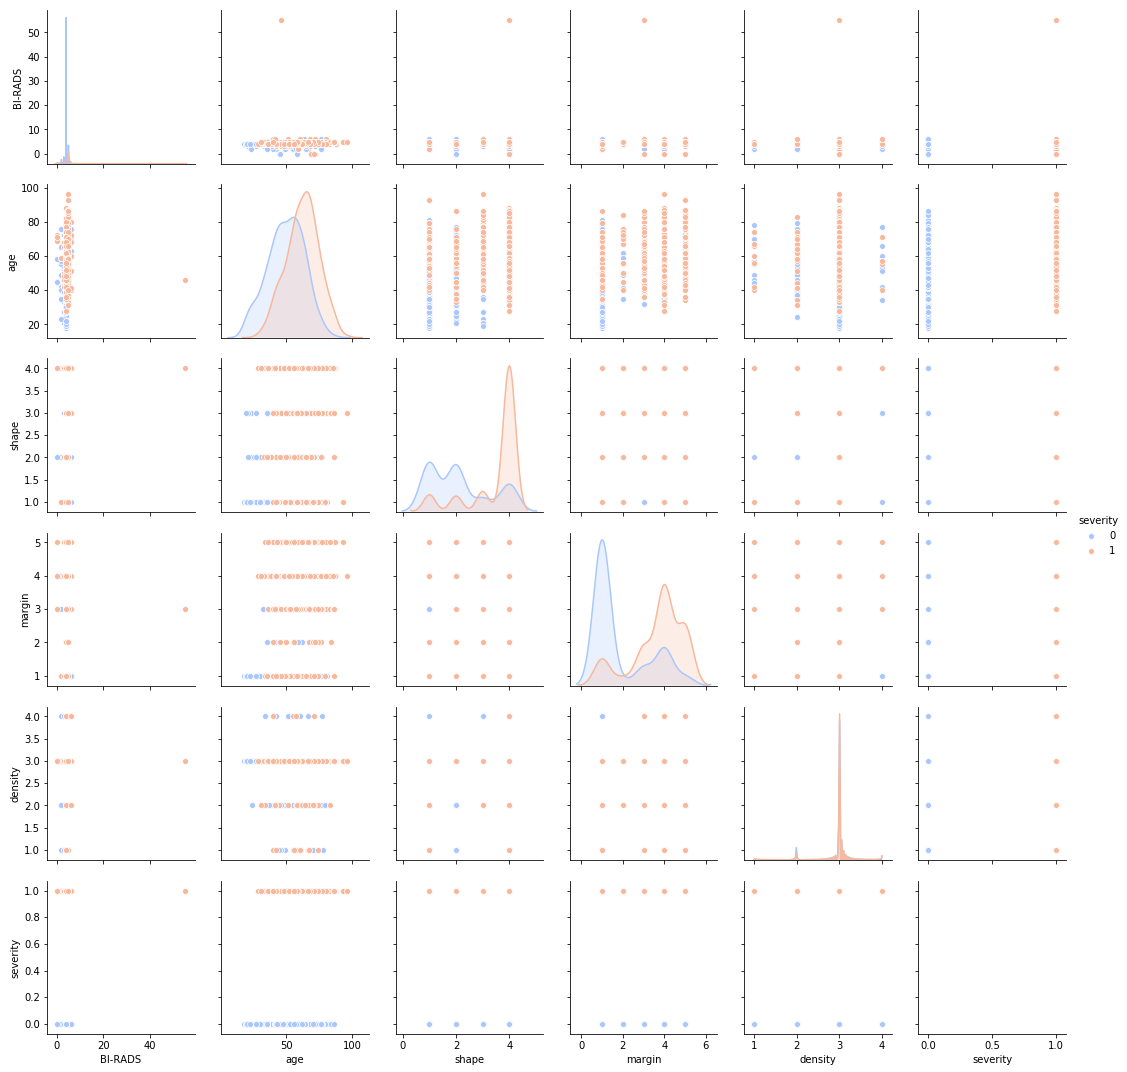

In [569]:
sns.pairplot(df, hue = 'severity', palette = 'coolwarm')

# Preparing Data (Dummy Variables, Scaling, Transforming)

First of all, we need to use dummy variable to prepare our categorical data for machine learning algorithm. 
If we have k values for a categorical feature, we can describe that data with K-1 new dummy columns. Shape and Margin are two categorical(nominal) features that should change to dummy variables by using get_dummies().

In [33]:
df1 = pd.get_dummies(df, columns=['shape','margin'] , drop_first=True)

## Dropping sevetity feature as it is our target variable
df1.columns.drop('severity')

Index(['BI-RADS', 'age', 'density', 'shape_2.0', 'shape_3.0', 'shape_4.0',
       'margin_2.0', 'margin_3.0', 'margin_4.0', 'margin_5.0'],
      dtype='object')

Using StandardScaler from Scikitlearn library, all the features are scaled and transformed. Therefore, these features can be
used in any scale sensetive models(like KNN).

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
# Instanciating StandardsCaler
sc = StandardScaler()

# using .fit_transform() and fropping our target variables.
sc_feat = sc.fit_transform(df1.drop('severity',axis=1))

# making a DataFrame out of our scaled-transformed features
df2 = pd.DataFrame(sc_feat, columns = df1.columns.drop('severity'))
df2

,BI-RADS,age,density,shape_2.0,shape_3.0,shape_4.0,margin_2.0,margin_3.0,margin_4.0,margin_5.0
0,0.366477,0.796164,0.224804,-0.530409,3.019237,-0.901780,-0.160043,-0.370511,-0.641218,2.462961
1,-0.195221,-0.866223,0.224804,-0.530409,-0.331210,-0.901780,-0.160043,-0.370511,-0.641218,-0.406015
2,0.366477,0.172769,0.224804,-0.530409,-0.331210,1.108918,-0.160043,-0.370511,-0.641218,2.462961
3,-0.195221,-1.905215,0.224804,-0.530409,-0.331210,-0.901780,-0.160043,-0.370511,-0.641218,-0.406015
4,0.366477,1.281027,0.224804,-0.530409,-0.331210,-0.901780,-0.160043,-0.370511,-0.641218,2.462961
5,-0.195221,0.657632,0.224804,-0.530409,-0.331210,-0.901780,-0.160043,-0.370511,-0.641218,-0.406015
6,-0.195221,1.003963,0.224804,-0.530409,-0.331210,1.108918,-0.160043,-0.370511,-0.641218,-0.406015
7,0.366477,-0.935489,0.224804,-0.530409,-0.331210,-0.901780,-0.160043,-0.370511,-0.641218,-0.406015
8,0.366477,0.103503,0.224804,-0.530409,-0.331210,-0.901780,-0.160043,-0.370511,-0.641218,2.462961
9,0.366477,0.311301,-5.244480,-0.530409,-0.331210,1.108918,-0.160043,-0.370511,-0.641218,2.462961


# Making train-test sample of dataset

Importing train_test_split from Scikitlratn library which makes it easy for us to take different sample of dataset.

In [31]:
from sklearn.cross_validation import train_test_split

In [36]:
# df2 scaled_transformed dataset whcih it's target variable has been dropped.
x = df2
# target variable
y = df1.severity
# using train_test_split by test_size = 0.3 (considering 30% of observation as test set) 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

# KNN

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.
In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is
used for classification or regression:

- In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors,
with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small).
If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

- In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation
is deferred until classification. The k-NN algorithm is among the simplest of all machine learning algorithms.

In [37]:
# importing KNeighborsClassifier from scikitlearn library
from sklearn.neighbors import KNeighborsClassifier

KNN can be used with a wide range of distance metric( euclidean, manhattan, chebyshev,minkowski, wminkowski,seuclidean, mahalanobis)
, I have tested most of them for this dataset, and the best result belongs to 'minkowski' with p = 2, which is the same as euclidean distance.

                            MinkowskiDistance ---> p ----> sum(|x - y|^p)^(1/p)

In [39]:
# instanciating KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7, metric='minkowski')
# Fitting tarining model to the model
knn.fit(x_train, y_train )
# passing x_test(test dataset features) through predict method() to get the final prediction
prediction = knn.predict(x_test)

To evaluate the model performance, Confusion Matrix and Classification Report are functioned.

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
# passing y_test(real values) and prediction(pridected values) through confusion matrix and classification report
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[134  24]
 [ 23 108]]
             precision    recall  f1-score   support

          0       0.85      0.85      0.85       158
          1       0.82      0.82      0.82       131

avg / total       0.84      0.84      0.84       289



As can be seen from above, 

recall : What proportion of actual positives was identified correctly ?

( True positive / True positive + False negative)  is 0.84 (84%)

and

Precision: What proportion of positive identifications was actually correct?

(True positive / True positive + False positive) is 0.84 (84%)

Note: In Confusion Matrix, Y-axis represent the actual values and X-axis indicates the predicted value. 

      the first row shows the negative(0) Predictions and second row represent the positive(1) values.
      so as an example: 
       
      recall for 1 --- > True positive / True positive + False negative ---> 108/24+108 = 0.82 roughly.

Let us find the best n_neighbors ( how many neigbors should be considered for the optimal result).
we consider 1 to 40 neighbors for KNN, and forming an error_rate for each level of neighbors.

In [47]:
# reset the index to start index from zero again with +1 increment
y_test_i = y_test.reset_index(drop=True)
y_test_i
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i )
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    error_rate.append(np.sqrt( sum((y_test_i - y_predict)**2) ))


Plotting the error_rate vs the K to find the optimal K by using matplotlib plot function().

Text(0,0.5,'Error Rate')

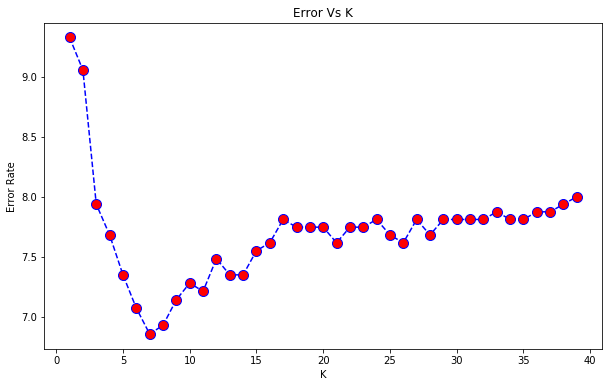

In [49]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate ,color='blue',linestyle ='dashed', marker= 'o',
        markerfacecolor = 'red',markersize=10)
plt.title('Error Vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')


Considering 7 as the best number of neighbors for KNN. So by k = 7 we get the minimum residual error, and we as a result the best possible accuracy for KNN which is 84%.


# Desicion Tree

Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance.
An instance is classified by starting at the root node of the tree,testing the attribute specified by this node,then moving down the tree branch corresponding
to the value of the attribute as shown in the above figure.This process is then repeated for the subtree rooted at the new node.

Strengths and Weakness of Decision Tree approach

The strengths of decision tree methods are:

Decision trees are able to generate understandable rules.

Decision trees perform classification without requiring much computation.

Decision trees are able to handle both continuous and categorical variables.

Decision trees provide a clear indication of which fields are most important for prediction or classification.



The weaknesses of decision tree methods :

Decision trees are less appropriate for estimation tasks where the goal is to predict the value of a continuous attribute.

Decision trees are prone to errors in classification problems with many class and relatively small number of training examples.

Decision tree can be computationally expensive to train. The process of growing a decision tree is computationally expensive.
At each node, each candidate splitting field must be sorted before its best split can be found. In some algorithms, combinations of fields are used and a search must be made for optimal combining weights. Pruning algorithms can also be expensive since many candidate sub-trees must be formed and compared.

Improting of DesicionTreeClassifier from sklearn.Tree. Instanciating DesicionTreeClassifier and storing it to dct variable.
passing x_train and y_train through fit() method. And, Finally, using predict method to predict the final result.

To evaluate the Decision Tree algorithm, confusion matrix and classification report are performed.

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [439]:
dct = DecisionTreeClassifier()
dct.fit(x_train,y_train)
dct_prediction = dct.predict(x_test)
print(confusion_matrix(dct_prediction,y_test))
print(classification_report(dct_prediction,y_test))

[[126  35]
 [ 32  96]]
             precision    recall  f1-score   support

          0       0.80      0.78      0.79       161
          1       0.73      0.75      0.74       128

avg / total       0.77      0.77      0.77       289




recall : 

( True positive / True positive + False negative)  is 0.77 (77%)

and

Precision: What proportion of positive identifications was actually correct?

(True positive / True positive + False positive) is 0.77 (77%)

This algorithm predicted 126 target variable with the 1 value correctly and 35 other positives which are not positive. in the following we use an ensemble algorithm like random forest to improve the prediction power of decision tree.

# Random Forest

Random Forests grows many classification trees. To classify a new object from an input vector, put the input vector down each of the trees in the forest. Each tree gives a classification, and the tree "votes" for that class. The forest chooses the classification having the most votes (over all the trees in the forest).

Features of Random Forests
It is unexcelled in accuracy among current algorithms.
It runs efficiently on large data bases.
It can handle thousands of input variables without variable deletion.
It gives estimates of what variables are important in the classification.
It generates an internal unbiased estimate of the generalization error as the forest building progresses.
It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
It has methods for balancing error in class population unbalanced data sets.

Random forests does not overfit. You can run as many trees as you want. It is fast. Running on a data set with 50,000 cases and 100 variables, it produced 100 trees in 11 minutes on a 800Mhz machine. For large data sets the major memory requirement is the storage of the data itself, and three integer arrays with the same dimensions as the data. If proximities are calculated, storage requirements grow as the number of cases times the number of trees.

In [68]:
from sklearn.ensemble import RandomForestClassifier

We just import RandomForestClassifier and make an instance of it, and other steps(fitting, predicting, evaluation are the same with Decision Tree). 


In [69]:
rf = RandomForestClassifier(n_estimators=137)
rf.fit(x_train, y_train)
rf_prediction = rf.predict(x_test)
print(confusion_matrix(rf_prediction,y_test))
print(classification_report(rf_prediction,y_test))

[[125  29]
 [ 33 102]]
             precision    recall  f1-score   support

          0       0.79      0.81      0.80       154
          1       0.78      0.76      0.77       135

avg / total       0.79      0.79      0.79       289



As it can be seen, the accuracy  of model has been increased by 2 percent roughly in compare to Decision Tree. 
It is not big difference, So Random Forest does not help to improve our model accuracy significantly.


Now, we are trying to find how many trees we need to vote for the best possible result.

In [62]:
y_test_i = y_test.reset_index(drop=True)
y_test_i
error_rate = []

for i in range(1,970):
    
    rf_ = RandomForestClassifier(n_estimators=i , )
    rf_.fit(x_train, y_train)
    rf_predict = rf_.predict(x_test)
    error_rate.append(np.sqrt( sum((y_test_i - rf_predict)**2) ))

Text(0,0.5,'Error Rate')

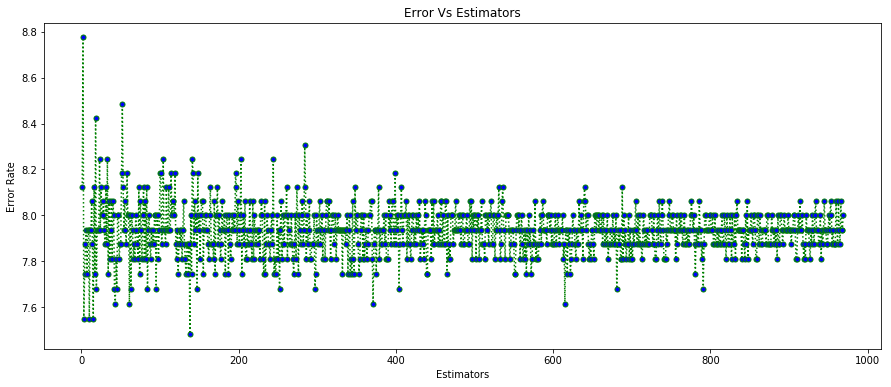

In [63]:
plt.figure(figsize = (15,6))
plt.plot(range(1,970), error_rate ,color='green',linestyle ='dotted', marker= 'o',
        markerfacecolor = 'blue',markersize=5)
plt.title('Error Vs Estimators')
plt.xlabel('Estimators')
plt.ylabel('Error Rate')

In [64]:
error_rate.index(np.min(error_rate))

137

Figure above shows that we get the least error_rate at the 137, it means by using 137 trees we can get the best possible accuracy.

Note:

    Random Forest , by diffualt, uses bootstrapping method to select the samples, therefore with every run we could get a     slightly different result.

# SVM

Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. This algorithm works by finding best possible hyper-planes for classification. SVM works well with high-dimensional data.

1- Improt the SVC from Scikitlearn python Library.

2- Make an isnstance(object) of the SVC model.

3- Fit the train data to the model.

4- Using x_test(test dataset observation) to predict result.

5- Evaluate the predicted result in compare with Target Variable(real observation, y_test).

In [81]:
from sklearn.svm import SVC

In [82]:
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
svm_prediction = svm.predict(x_test)
print(confusion_matrix(svm_prediction,y_test))
print(classification_report(svm_prediction,y_test))

[[129  20]
 [ 29 111]]
             precision    recall  f1-score   support

          0       0.82      0.87      0.84       149
          1       0.85      0.79      0.82       140

avg / total       0.83      0.83      0.83       289



The model accuracy is about 83% which is better than Decision Tree(77%) and Random Forest(79%), but slighlty less than KNN(84%) a simple machine learning algorithm.

We uses different kernel of SVM to check which one has the best result in our data(Using linear, ploy, rbf and sigmoidkernel).


In [83]:
y_test_i = y_test.reset_index(drop=True)
y_test_i
error_rate = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_ = SVC(kernel = kernel)
    svm_.fit(x_train, y_train)
    svm_predict = svm_.predict(x_test)
    error_rate.append(np.sqrt( sum((y_test_i - svm_predict)**2) ))
    print('kernel:',kernel,'\n',confusion_matrix(svm_predict,y_test))
    print('\n')
    print('kernel:',kernel,'\n',classification_report(svm_predict,y_test))


kernel: linear 
 [[129  20]
 [ 29 111]]


kernel: linear 
              precision    recall  f1-score   support

          0       0.82      0.87      0.84       149
          1       0.85      0.79      0.82       140

avg / total       0.83      0.83      0.83       289

kernel: poly 
 [[126  23]
 [ 32 108]]


kernel: poly 
              precision    recall  f1-score   support

          0       0.80      0.85      0.82       149
          1       0.82      0.77      0.80       140

avg / total       0.81      0.81      0.81       289

kernel: rbf 
 [[123  19]
 [ 35 112]]


kernel: rbf 
              precision    recall  f1-score   support

          0       0.78      0.87      0.82       142
          1       0.85      0.76      0.81       147

avg / total       0.82      0.81      0.81       289

kernel: sigmoid 
 [[158 131]
 [  0   0]]


kernel: sigmoid 
              precision    recall  f1-score   support

          0       1.00      0.55      0.71       289
          1       0.

C:\Program Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


the Classification Report and Confusion Matrix indicate linear model has the best possible result and sigmiod the worst.
in sigmoid presicion is shown by 1 but when we take look at associated confusion matrix, It can be clearly seen that sigmoid 
identify all the observation as 0 (negative) which has a big error for finding postivie samples.

Text(0,0.5,'Error Rate')

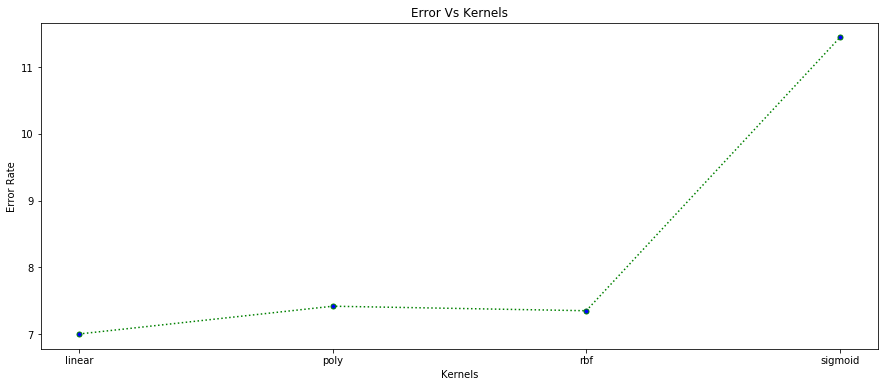

In [84]:
plt.figure(figsize = (15,6))
plt.plot(kernels, error_rate ,color='green',linestyle ='dotted', marker= 'o',
        markerfacecolor = 'blue',markersize=5)
plt.title('Error Vs Kernels')
plt.xlabel('Kernels')
plt.ylabel('Error Rate')

Figure above shows the less possible error_rate vs chosen the Kernels. (linear kernel has the less error_rate)

# Voting (Ensemble method using some different models)

Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. This has been the case in a number of machine learning competitions, where the winning solutions used ensemble methods. In the popular Netflix Competition, the winner used an ensemble method to implement a powerful collaborative filtering algorithm. Another example is KDD 2009 where the winner also used ensemble methods. You can also find winners who used these methods in Kaggle competitions.

The first step is to create multiple classification/regression models using some training dataset. Each base model can be created using different splits of the same training dataset and same algorithm, or using the same dataset with different algorithms, or any other method.

Every model makes a prediction (votes) for each test instance and the final output prediction is the one that receives more than half of the votes. If none of the predictions get more than half of the votes, we may say that the ensemble method could not make a stable prediction for this instance. 
Unlike majority voting, where each model has the same rights, we can increase the importance of one or more models. In weighted voting you count the prediction of the better models multiple times.

First, import VotingClassifier from Scikitlearn.ensemble 

In [85]:
from sklearn.ensemble import VotingClassifier

Three different models used to make an ensemble model( SVM, Random Forest, and KNN)

1- make an instance of VotingClassifier by passing our chosing model through it as arguments.

2- fit the train data to model.

3- using score() method to evaluate the predicted result against actual value(y-test).


In [99]:
vtc = VotingClassifier(estimators= [('svm',SVC(kernel='linear')),('rf', RandomForestClassifier(n_estimators = 137)),
                                    ('KNN',KNeighborsClassifier(n_neighbors = 7))], voting = 'hard')
vtc.fit(x_train, y_train)
vtc.score(x_test,y_test)

0.82698961937716264

The accuracy of our model based on three different models is 82.5 % roughly which is less than the result of KNN or SVM.

# Bagging

Bootstrap Aggregation (or Bagging for short), is a simple and very powerful ensemble method.

An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.

Bootstrap Aggregation is a general procedure that can be used to reduce the variance for those algorithm that have high variance. An algorithm that has high variance are decision trees, like classification and regression trees (CART).

Decision trees are sensitive to the specific data on which they are trained. If the training data is changed (e.g. a tree is trained on a subset of the training data) the resulting decision tree can be quite different and in turn the predictions can be quite different.

Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.

How it works :

1- make an instance of BaggingClassifier from sklearn.ensemble.

2- fit the train data to model.

3- using score() method to evaluate the predicted result against actual value(y-test).

In [117]:
from sklearn.ensemble import  BaggingClassifier

In [116]:
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 137)
bag.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=137, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

This technique gives us 81% accuracy which is better than Random Forest(79%), the interesting part is it gives us 90% accuracy on the training dataset. but when it comes to test dataset the peformance goes down by roughly 10%.

In [466]:
bag.score(x_test,y_test)

0.80968858131487886

In [451]:
bag.score(x_train,y_train)

0.90625

# Boosting (AdaBoost)

Boosting is a method of converting weak learners into strong learners. In boosting, each new tree is a fit on a modified version of the original data set. The gradient boosting algorithm (gbm) can be most easily explained by first introducing the AdaBoost Algorithm.The AdaBoost Algorithm begins by training a decision tree in which each observation is assigned an equal weight. After evaluating the first tree, we increase the weights of those observations that are difficult to classify and lower the weights for those that are easy to classify. The second tree is therefore grown on this weighted data. Here, the idea is to improve upon the predictions of the first tree. Our new model is therefore Tree 1 + Tree 2. We then compute the classification error from this new 2-tree ensemble model and grow a third tree to predict the revised residuals. We repeat this process for a specified number of iterations. Subsequent trees help us to classify observations that are not well classified by the previous trees. Predictions of the final ensemble model is therefore the weighted sum of the predictions made by the previous tree models.

1- make an instance of AdaBoostClassifier from sklearn.ensemble. a decision tree passed throug the AdaBoostClassifier.

2- fit the train data to model.(x_train,y_train)

3- using score() method to evaluate the predicted result against actual value(y-test).

In [121]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 20, learning_rate = 1)
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=20, random_state=None)

The accuracy is roughly about 78% which is not significant. Therefore, Adaboost does not work well on our dataset, although it works well on the training set with 93% accuracy.

In [130]:
ada.score(x_test,y_test)


0.77854671280276821

In [133]:
ada.score(x_train,y_train)

0.93898809523809523

In [140]:
print ( 'total:',len(y_test ), '1 target:', len(y_test[y_test==1]), '0 target:', len(y_test[y_test==0]))
print ( 'total:',len(prediction ), '1 target:', len(prediction[prediction==1]), '0 target:', len(prediction[prediction==0]))


total: 289 1 target: 131 0 target: 158
total: 289 1 target: 132 0 target: 157


# Conclusion

In previous sections, I discussed technically about different machine learning algorithm, after that I implement voting
boosting and bagging techniques to improve the result, but it seems the best techniques is KNN(84% accuracy) for this dataset.
Now I want to try to infer the result from medical aspect.

this the final result of confusion matrix and classification report for KNN:
    
    
[[134  24]
 [ 23 108]]
             precision    recall  f1-score   support

          0       0.85      0.85      0.85       158
          1       0.82      0.82      0.82       131

avg / total       0.84      0.84      0.84       289

recall : 

( True positive / True positive + False negative)

and

Precision:

(True positive / True positive + False positive) 

our model predicted 157 cases with beingn mass and 132 observations with malignant mass.


This result indicates that our model predicted 108 out of 132 cases whcih have malignant mammographic mass lesion correctly, while it identified 24 benign case as malignant. (recall for 1 = 82%)

134 beinign cases were predicted correctly, and 23 malignant cases were considered as benign cases by mistake. (recall for 0 = 85%)

based on the result 134 out of 158 cases has been recognised correctly as having benign mass while 24 observatios with benign mass were missclassifed as malignant mass.(precision for 0 = 85%)

finally, from total of 131 actual positive( 1= malignant) cases, 108 caces were predicted precisely, and 23 cases (they predicted as benign) were classified by mistake. (precision for 1 = 82%)

To sum up, Amazingly, KNN has the best accuracy between models that I examined with 84% avarage accuracy. This research may go furture by considering other machine learning techniques like Neural Network or Naive Bayes, or by finding the best distance metric and applying some advanced statistical thechniques which it required more time. In this research I have tried to implement diffrent techniques and comparing the results to each other to find the best model to fit our data, which suprisengly is KNN.


